<a href="https://colab.research.google.com/github/andref03/Previsao-de-Churn/blob/main/Base_de_Dados_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classificação de Dados por Machine Learning**

#### **Análise Exploratória**

In [90]:
import pandas as pd

In [91]:
dados = pd.read_csv('/content/churn.csv')

In [92]:
dados = dados.drop('id_cliente', axis = 1)

In [93]:
dados

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   score_credito        10000 non-null  int64  
 1   pais                 10000 non-null  object 
 2   sexo_biologico       10000 non-null  object 
 3   idade                10000 non-null  int64  
 4   anos_de_cliente      10000 non-null  int64  
 5   saldo                10000 non-null  float64
 6   servicos_adquiridos  10000 non-null  int64  
 7   tem_cartao_credito   10000 non-null  int64  
 8   membro_ativo         10000 non-null  int64  
 9   salario_estimado     10000 non-null  float64
 10  churn                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [95]:
import plotly.express as px

In [96]:
px.histogram(dados, x = 'churn', text_auto = True)

In [97]:
px.box(dados, x = 'score_credito', color = 'churn')

In [98]:
px.histogram(dados, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

In [99]:
px.histogram(dados, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

In [100]:
px.box(dados, x = 'idade', color = 'churn')

In [101]:
px.box(dados, x = 'anos_de_cliente', color = 'churn')

In [102]:
px.box(dados, x = 'saldo', color = 'churn')

In [103]:
px.box(dados, x = 'servicos_adquiridos', color = 'churn')

In [104]:
px.histogram(dados, x = 'tem_cartao_credito', text_auto = True, color = 'churn', barmode = 'group')

In [105]:
px.histogram(dados, x = 'membro_ativo', text_auto = True, color = 'churn', barmode = 'group')

In [106]:
px.box(dados, x = 'salario_estimado', color = 'churn')

#### **Separação de Variáveis**

In [107]:
x = dados.drop('churn', axis = 1)
y = dados['churn']

In [108]:
x

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52


In [109]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

#### **Transformando Variáveis Explicativas**

In [110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [111]:
colunas = x.columns

In [112]:
one_hot = make_column_transformer((
      OneHotEncoder(drop = 'if_binary'),
      ['pais',	'sexo_biologico'	]
    ),
    remainder = 'passthrough' ,
    sparse_threshold=0
 )

In [113]:
x = one_hot.fit_transform(x)

In [114]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__servicos_adquiridos',
       'remainder__tem_cartao_credito', 'remainder__membro_ativo',
       'remainder__salario_estimado'], dtype=object)

In [115]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,1.0,1.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,1.0,1.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,0.0,1.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,0.0,0.0,1.0,0.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,0.0,0.0,1.0,1.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,1.0,0.0,0.0,0.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


#### **Transformando a Variável Alvo**

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
label_encoder = LabelEncoder()

In [118]:
y = label_encoder.fit_transform(y)

In [119]:
y

array([1, 0, 1, ..., 1, 1, 0])

#### **Divisão de Treino e Teste**

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

#### **Modelo de Base**

In [122]:
from sklearn.dummy import DummyClassifier

In [123]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7964

#### **Árvore de Decisão**

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
arvore = DecisionTreeClassifier(random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [126]:
arvore.predict(x_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
arvore.score(x_teste, y_teste)

0.7984

In [128]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [129]:
nome_colunas = ['Alemanha',
                'Espanha',
                'França',
                'Mulher',
                'score_credito',
                'idade',
                'anos_de_cliente',
                'saldo',
                'servicos_adquiridos',
                'tem_cartao_credito',
                'membro_ativo',
                'salario_estimado']

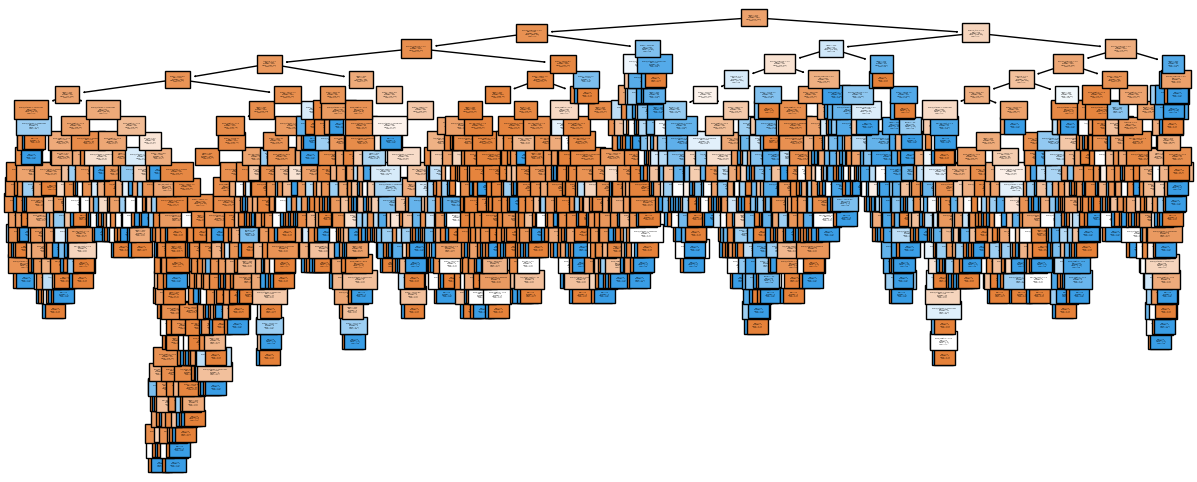

In [130]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True, class_names = ['nao','sim'], fontsize = 1, feature_names = nome_colunas);

In [131]:
arvore.score(x_treino, y_treino)

1.0

In [132]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [133]:
arvore.score(x_treino, y_treino)

0.842

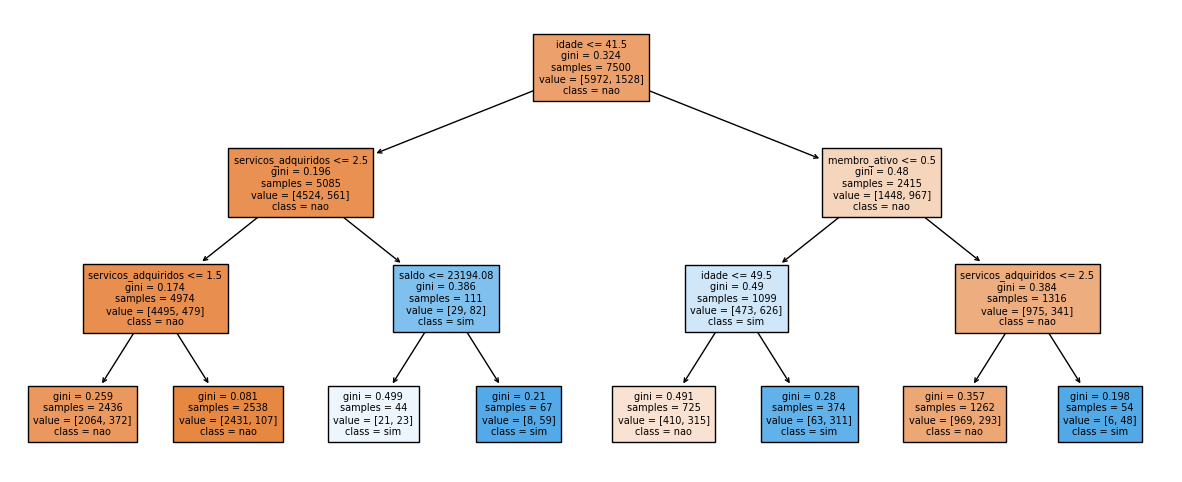

In [134]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True, class_names = ['nao','sim'], fontsize = 7, feature_names = nome_colunas);

In [135]:
arvore.score(x_teste, y_teste)

0.8368

#### **Normalizando Dados**

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [138]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,1.0,0.796,0.216216,0.8,0.000000,0.333333,1.0,0.0,0.267600
1,0.0,0.0,1.0,0.0,0.612,0.256757,0.2,0.000000,0.333333,0.0,1.0,0.338919
2,1.0,0.0,0.0,1.0,0.634,0.256757,0.5,0.386645,0.666667,1.0,0.0,0.890516
3,0.0,0.0,1.0,1.0,0.514,0.040541,0.0,0.000000,0.333333,1.0,0.0,0.580365
4,0.0,1.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.0,1.0,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,1.0,0.0,0.609048
7496,0.0,1.0,0.0,1.0,0.676,0.229730,0.6,0.000000,0.000000,1.0,0.0,0.127054
7497,0.0,1.0,0.0,1.0,0.646,0.229730,0.6,0.000000,0.333333,1.0,0.0,0.492884
7498,0.0,0.0,1.0,1.0,0.720,0.202703,0.2,0.000000,0.333333,1.0,0.0,0.364454


#### **Algoritmo KNN: calculando distâncias**

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn = KNeighborsClassifier()

In [141]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [142]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [143]:
knn.score(x_teste_normalizado, y_teste)

0.8172

#### **Escolhendo e Salvando o melhor modelo**

In [144]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.7964
Acurácia Árvore: 0.8368
Acurácia KNN: 0.8172


In [145]:
import pickle

In [146]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [147]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

In [148]:
dados

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


#### **Testando a previsão do modelo**

In [154]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})

In [150]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,850,França,Homem,27,3,56000,1,sim,sim,85270.0


In [158]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [157]:
# modelo_arvore.predict(novo_dado) # não funciona antes de transformar através do one_hot

In [161]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

ValueError: X has 12 features, but ColumnTransformer is expecting 10 features as input.